In [40]:
!pip install kagglehub

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("preethamgouda/banglore-city-traffic-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'banglore-city-traffic-dataset' dataset.
Path to dataset files: /kaggle/input/banglore-city-traffic-dataset


In [43]:
import pandas as pd

df = pd.read_csv(path + "/Banglore_traffic_Dataset.csv")
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [44]:
# Standard Cleaning of data
df = df.dropna()
df = df.drop_duplicates()

# Date se relation nahi h it's better to drop it.
df = df.drop(columns=["Date"])

# We can't and probably shouldnt drop this.
#  0   Area Name                           8936 non-null   object
#  1   Road/Intersection Name              8936 non-null   object
# Weather like rain can depend on them, The Area might have drainage problem that can cause traffic in rain for example.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Area Name                           8936 non-null   object 
 1   Road/Intersection Name              8936 non-null   object 
 2   Traffic Volume                      8936 non-null   int64  
 3   Average Speed                       8936 non-null   float64
 4   Travel Time Index                   8936 non-null   float64
 5   Congestion Level                    8936 non-null   float64
 6   Road Capacity Utilization           8936 non-null   float64
 7   Incident Reports                    8936 non-null   int64  
 8   Environmental Impact                8936 non-null   float64
 9   Public Transport Usage              8936 non-null   float64
 10  Traffic Signal Compliance           8936 non-null   float64
 11  Parking Usage                       8936 no

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# df['Area Name'].unique()

df["Area Name"] = le.fit_transform(df["Area Name"])
df.head()

,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,6,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,4,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,4,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [46]:
# df['Road/Intersection Name'].unique()

df["Road/Intersection Name"] = le.fit_transform(df["Road/Intersection Name"])
df.head()

,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2,0,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2,3,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,6,8,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,4,11,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,4,9,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [47]:
# df['Weather Conditions'].unique()

df["Weather Conditions"] = le.fit_transform(df["Weather Conditions"])
df.head()

,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2,0,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,0,No
1,2,3,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,0,No
2,6,8,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,0,No
3,4,11,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,0,No
4,4,9,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,0,No


In [48]:
df["Roadwork and Construction Activity"] = (
    df["Roadwork and Construction Activity"]
    .str.strip()
    .str.lower()
    .map({"yes": 1, "no": 0})
)

df.head()
# df['Roadwork and Construction Activity'].unique()

,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2,0,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,0,0
1,2,3,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,0,0
2,6,8,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,0,0
3,4,11,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,0,0
4,4,9,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,0,0


**One-hot encoding** means:

* A categorical value is turned into **multiple binary columns**
* Exactly **one column is 1**, the rest are **0**

Example:

```
Weather
Clear
Rain
Fog
```

After one-hot encoding:

```
Weather_Clear  Weather_Rain  Weather_Fog
1              0             0
0              1             0
0              0             1
```

Used when categories have **no numeric order**.


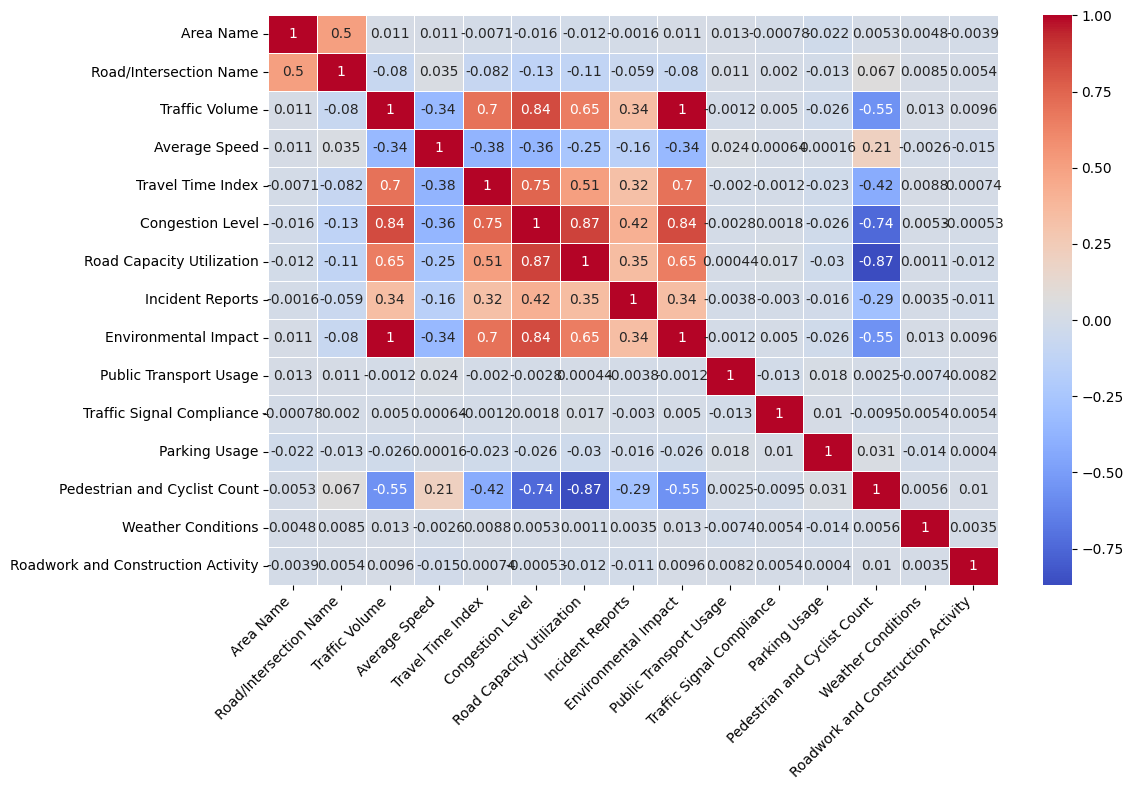

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(),
    annot=True,      # TURN OFF numbers
    cmap="coolwarm",
    linewidths=0.5
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [50]:
# X = inputs (features)
# y = what you predict (targets)

average_speed_df = df["Average Speed"]
congestion_level_df = df["Congestion Level"]

xdf_average_speed = df.drop(columns=[
    "Average Speed",
    "Congestion Level",
    "Area Name",
    "Road/Intersection Name",
    "Public Transport Usage",
    "Traffic Signal Compliance",
    "Parking Usage",
    "Weather Conditions",
    "Roadwork and Construction Activity",
    "Environmental Impact"
])

In [51]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

xdf_average_speed = pd.DataFrame(
    scaler.fit_transform(xdf_average_speed),
    columns=xdf_average_speed.columns,
    index=xdf_average_speed.index
)

xdf_average_speed.head()

,Traffic Volume,Travel Time Index,Road Capacity Utilization,Incident Reports,Pedestrian and Cyclist Count
0,1.642475,0.752807,0.480677,-1.105933,-0.095987
1,0.122217,0.752807,0.480677,-0.401692,-0.394815
2,-1.679633,-2.035479,-3.354921,-1.105933,2.022972
3,2.433486,0.752807,0.480677,-0.401692,-0.095987
4,2.157971,0.752807,0.480677,1.006791,-0.286151


In [52]:
print(congestion_level_df.head())

0    100.000000
1    100.000000
2     28.347994
3    100.000000
4    100.000000
Name: Congestion Level, dtype: float64


In [53]:
print(average_speed_df.head())

0    50.230299
1    29.377125
2    54.474398
3    43.817610
4    41.116763
Name: Average Speed, dtype: float64


Q. What to use ML or DL ?

A. ML, not DL - **Use classical ML algorithms.**

Why ?

1. Tabular data
2. ~9k rows
3. No images, no sequences

DL adds nothing, only complexity

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xdf_average_speed, average_speed_df, test_size=0.20, random_state=42)

In [55]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

rf  = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("GBR R2:", gbr.score(X_test, y_test))
print("RF R2:", rf.score(X_test, y_test))

GBR R2: 0.1748099680482873
RF R2: 0.051481526782887976


In [56]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

bag.fit(X_train, y_train)
print("Bagging R2:", bag.score(X_test, y_test))

Bagging R2: 0.05179807862233665


In [57]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

bag_gbr = BaggingRegressor(
    estimator=GradientBoostingRegressor(random_state=42),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

bag_gbr.fit(X_train, y_train)
print("Bagged GBR R2:", bag_gbr.score(X_test, y_test))

Bagged GBR R2: 0.1763302966935153


In [58]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
print("GBR R2:", gbr.score(X_test, y_test))

GBR R2: 0.17072380198628434


In [59]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)

ada.fit(X_train, y_train)
print("AdaBoost R2:", ada.score(X_test, y_test))


AdaBoost R2: 0.18080834156401437
